### Import Libraries

In [104]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
admission = pd.read_csv(r"C:\Users\Suresh\Downloads\admission.csv")
admission

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


### Q1. Perform Exploratory Data Analysis (EDA) tasks

* a) Visualize the 10 random rows of the data set
* b) Generate the description for numeric variables
* c) Check the shape of the data set
* d) Generate the correlation matrix
* e) Generate a correlogram

In [3]:
admission.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


<AxesSubplot:>

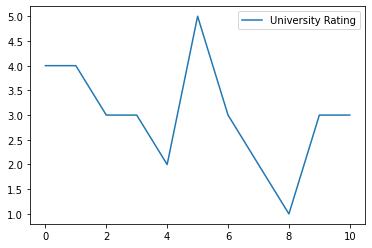

In [4]:
admission.iloc[0:11].plot(y='University Rating')

<AxesSubplot:>

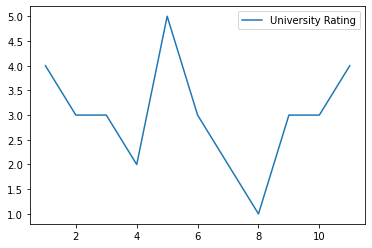

In [5]:
admission.iloc[1:12].plot(y='University Rating')

<AxesSubplot:>

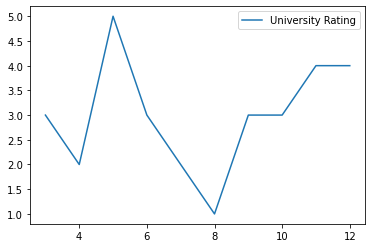

In [6]:
admission.iloc[3:13].plot(y='University Rating')

<AxesSubplot:>

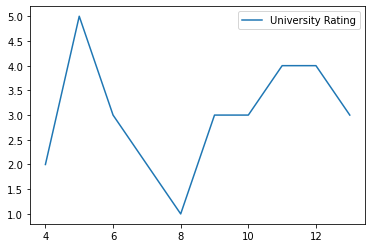

In [7]:
admission.iloc[4:14].plot(y='University Rating')

<AxesSubplot:>

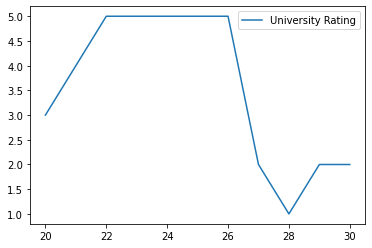

In [8]:
admission.iloc[20:31].plot(y='University Rating')

<AxesSubplot:>

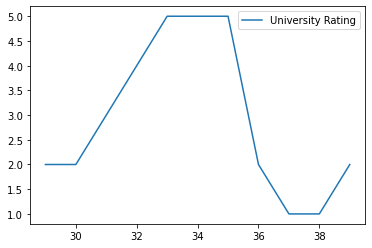

In [9]:
admission.iloc[29:40].plot(y='University Rating')

<AxesSubplot:>

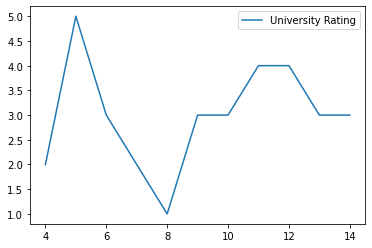

In [10]:
admission.iloc[4:15].plot(y='University Rating')

<AxesSubplot:>

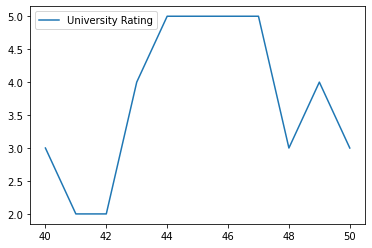

In [11]:
admission.iloc[40:51].plot(y='University Rating')

<AxesSubplot:>

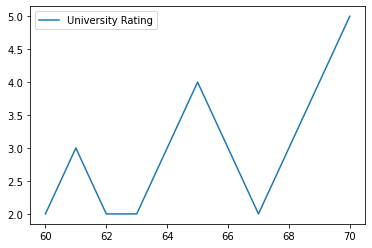

In [12]:
admission.iloc[60:71].plot(y='University Rating')

<AxesSubplot:>

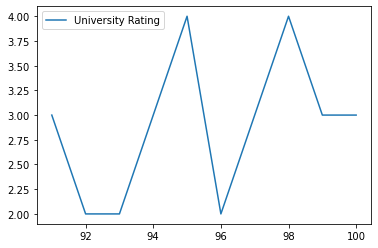

In [13]:
admission.iloc[91:101].plot(y='University Rating')

In [14]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [15]:
admission.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

In [16]:
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<AxesSubplot:>

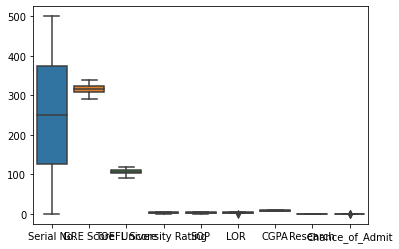

In [17]:
sns.boxplot(data=admission)

In [18]:
def upper_outliers(admission):    
    for i in admission:
        q1=admission[i].quantile(0.25)
        q3=admission[i].quantile(0.75)
        iqr = q3-q1
        upper_limit = q3+1.5*iqr
        admission[i]=np.where(admission[i]>upper_limit,upper_limit,admission[i])

In [19]:
upper_outliers(admission)

In [20]:
def lower_outliers(admission):    
    for i in admission:
        q1=admission[i].quantile(0.25)
        q3=admission[i].quantile(0.75)
        iqr = q3-q1
        lower_limit = q1-1.5*iqr
        admission[i]=np.where(admission[i]<lower_limit,lower_limit,admission[i])

In [21]:
lower_outliers(admission)

<AxesSubplot:>

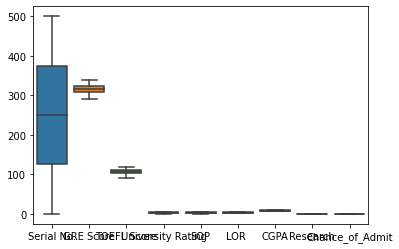

In [22]:
sns.boxplot(data=admission)

In [23]:
admission.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [24]:
admission.shape

(500, 9)

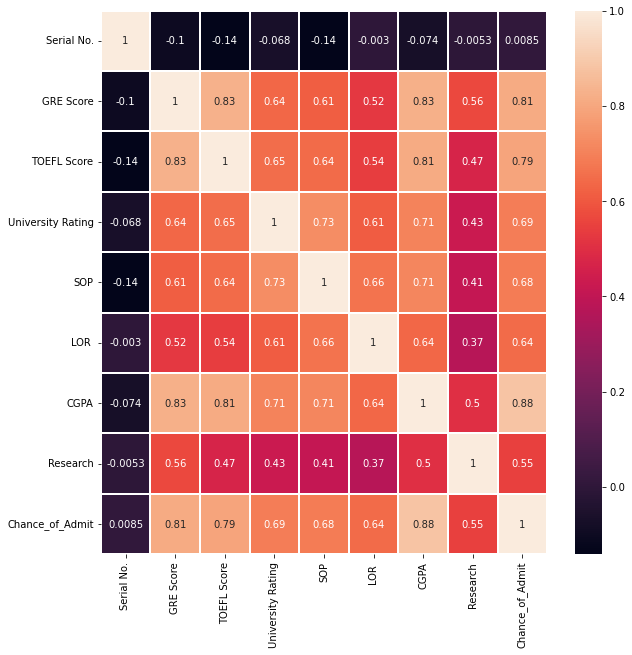

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(admission.corr(),annot=True,linewidths=0.05)
plt.show()

In [26]:
admission.drop(['Serial No.'],axis=1,inplace=True)

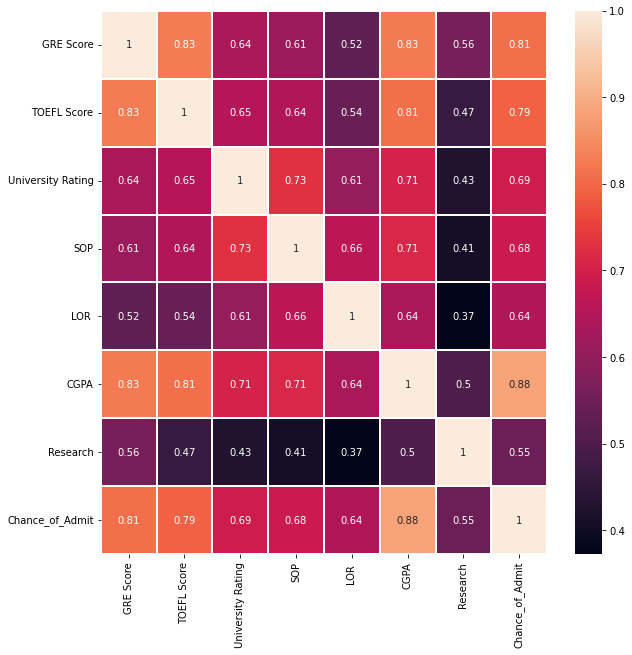

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(admission.corr(),annot=True,linewidths=0.05)
plt.show()

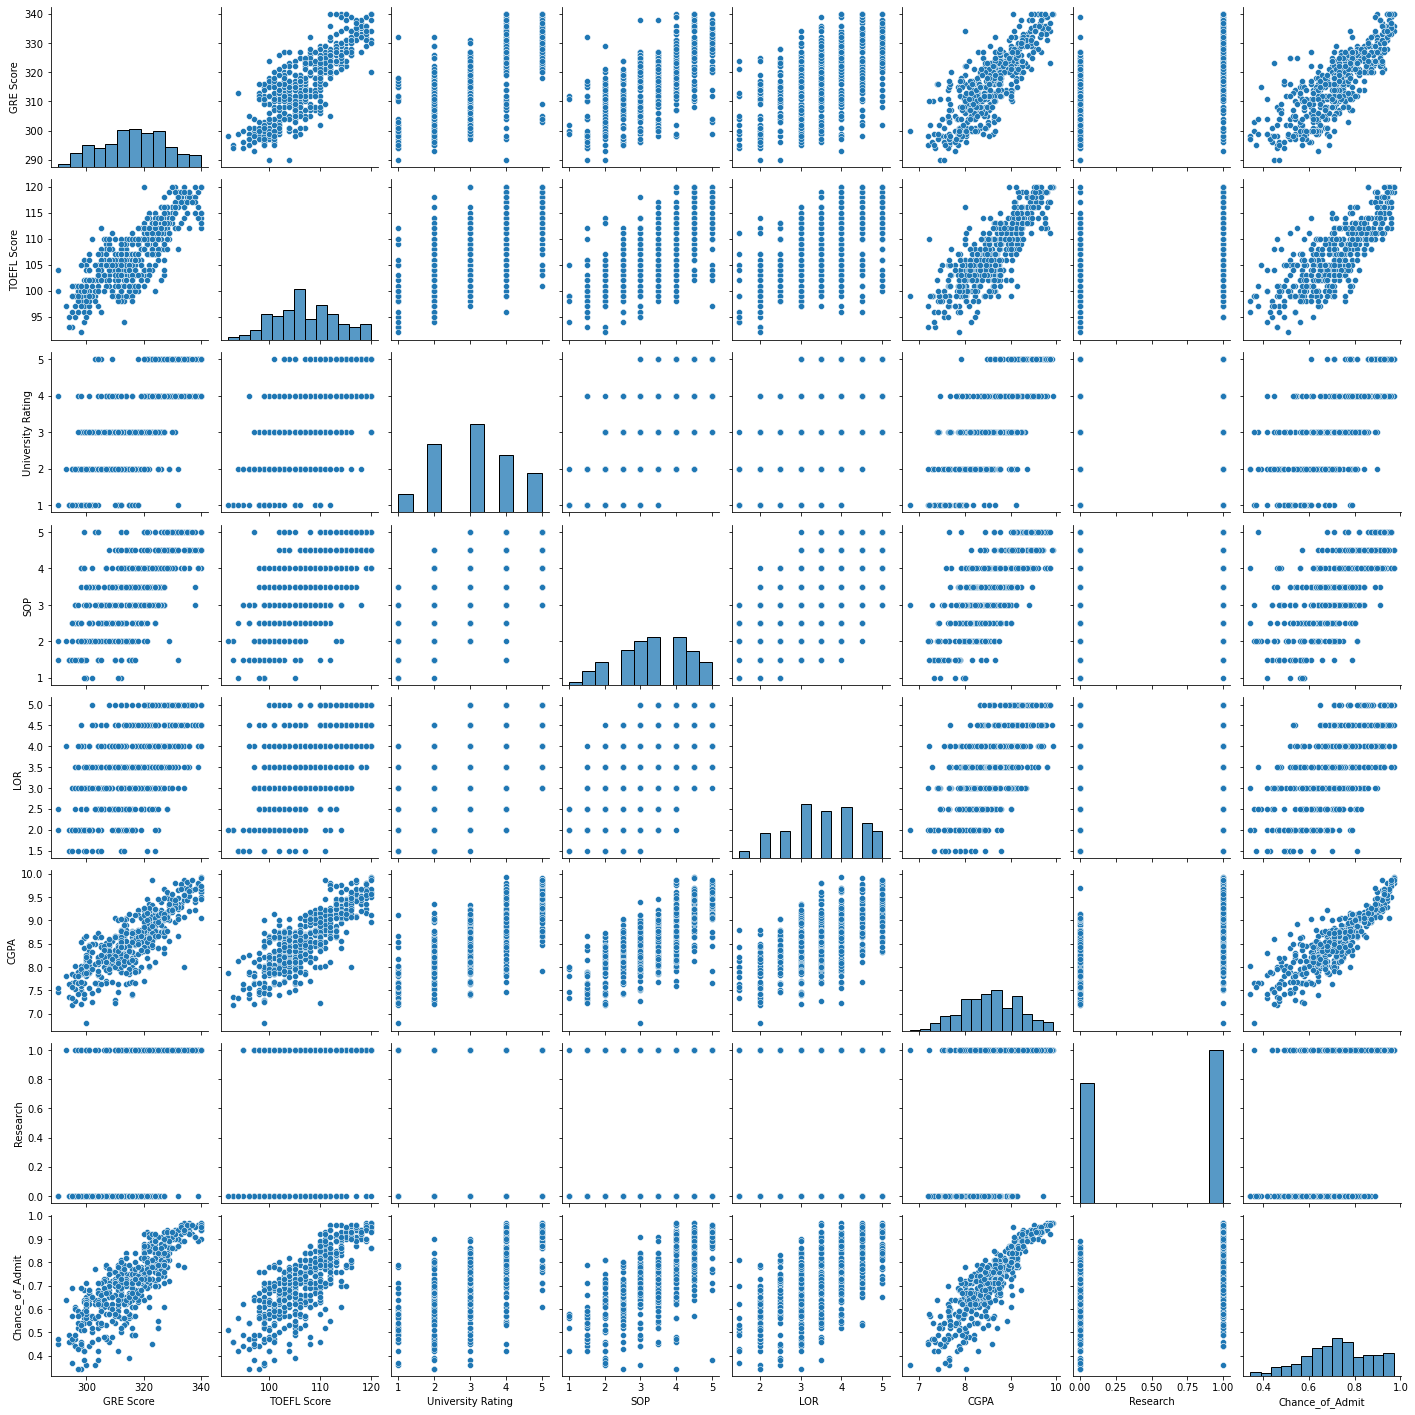

In [28]:
sns.pairplot(admission)
plt.show()

### Q.2 Find out the minimum and maximum values for GRE
score

In [29]:
print('Maximum Value of GRE',max(admission['GRE Score']))
print('Minimum Value of GRE',min(admission['GRE Score']))

Maximum Value of GRE 340.0
Minimum Value of GRE 290.0


### Q.3 Find out the percentage of universities for each
university rating 

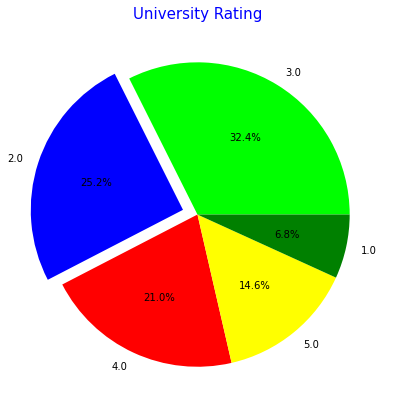

In [30]:
colors = ['lime','blue','red','yellow','green']
explode = [0,0.1,0,0,0]
plt.figure(figsize = (7,7))
plt.pie(admission['University Rating'].value_counts().values, explode = explode,
        labels = admission['University Rating'].value_counts().index, colors = colors, autopct ='%1.1f%%')
plt.title('University Rating',color='blue',fontsize=15)
plt.show()

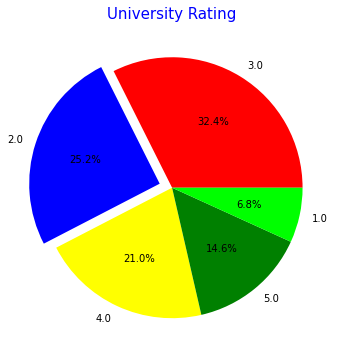

In [31]:
colors = ['red','blue','yellow','green','lime']
explode = [0,0.1,0,0,0]
plt.figure(figsize=(6,6))
plt.pie(admission['University Rating'].value_counts().values, explode=explode,labels= admission['University Rating'].value_counts().index, colors=colors,autopct='%1.1f%%')
plt.title('University Rating', color='blue',fontsize=15)
plt.show()

### Q4 Convert the target variable “Chance of Admit” to
categorical having values 0 and 1,such that :
Students having the “Chance of Admit” value > 0.80, are assigned
value 1, and
Students having the “Chance of Admit” value < 0.80, are assigned
value 0
Where 0: Low chance of Admission and 1: High chance of
admission


In [32]:
admission

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


Q.5 Build a Decision Tree classifier, to predict whether a
student has a low or high chance of admission to a chosen
university. Perform Hyperparameter Tuning to improve
the accuracy of the model

In [33]:
def abc(admission):
    if admission['Chance_of_Admit']>=0.80:
        return'1'
    elif admission['Chance_of_Admit']<0.80:
        return'0'
admission['Chance_of_Admit'] = admission.apply(lambda x:abc(x),axis=1)

In [36]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = admission.drop(['Chance_of_Admit'],axis=1)
y = admission[['Chance_of_Admit']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

In [37]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

### Plooting Tree

In [38]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Chance_of_Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
7,0,308.0,101.0,2.0,3.0,4.0,7.90,0.0
47,1,339.0,119.0,5.0,4.5,4.0,9.70,0.0
143,1,340.0,120.0,4.0,4.5,4.0,9.92,1.0
161,0,298.0,99.0,1.0,1.5,3.0,7.46,0.0
224,0,305.0,105.0,2.0,3.0,2.0,8.23,0.0


In [39]:
independent_variable = list(train.columns[1:])
independent_variable

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research']

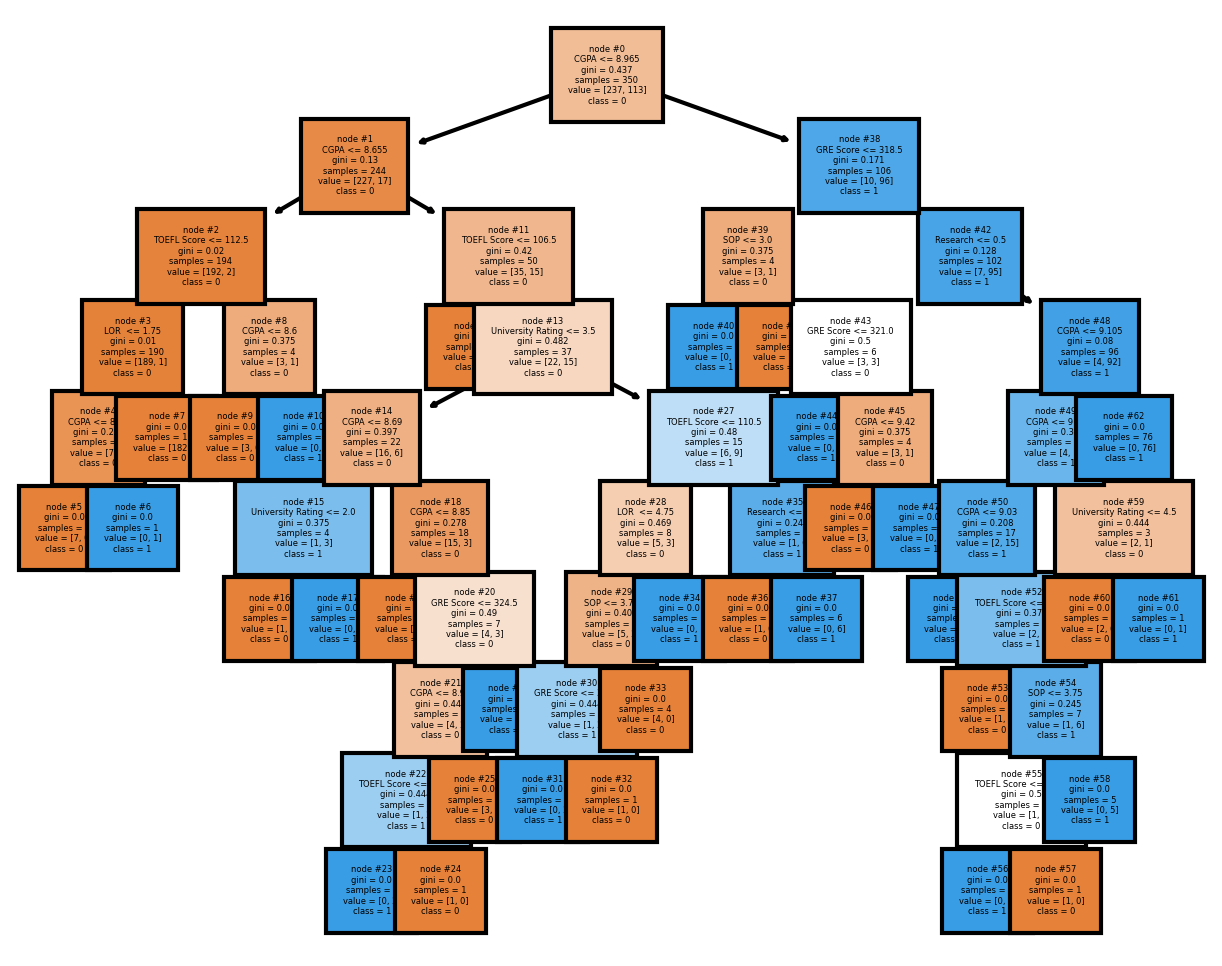

In [41]:
from sklearn import tree
import matplotlib.pyplot as plt

Chance_of_Admit=['0','1']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Chance_of_Admit, 
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

#### prediction on Train Dataset

In [42]:
train.head()

,Chance_of_Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
7,0,308.0,101.0,2.0,3.0,4.0,7.90,0.0
47,1,339.0,119.0,5.0,4.5,4.0,9.70,0.0
143,1,340.0,120.0,4.0,4.5,4.0,9.92,1.0
161,0,298.0,99.0,1.0,1.5,3.0,7.46,0.0
224,0,305.0,105.0,2.0,3.0,2.0,8.23,0.0


In [43]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Chance_of_Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Predicted
7,0,308.0,101.0,2.0,3.0,4.0,7.90,0.0,0
47,1,339.0,119.0,5.0,4.5,4.0,9.70,0.0,1
143,1,340.0,120.0,4.0,4.5,4.0,9.92,1.0,1
161,0,298.0,99.0,1.0,1.5,3.0,7.46,0.0,0
224,0,305.0,105.0,2.0,3.0,2.0,8.23,0.0,0


### Model Performance Metrics

In [45]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Chance_of_Admit'])
print(matrix)

[[237   0]
 [  0 113]]


In [47]:
accuracy_train=((237+113)/(350)*100)
accuracy_train

100.0

In [49]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00       113

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



### Model Improvement by Pruning Method ( Cut Tree)

In [50]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=200)

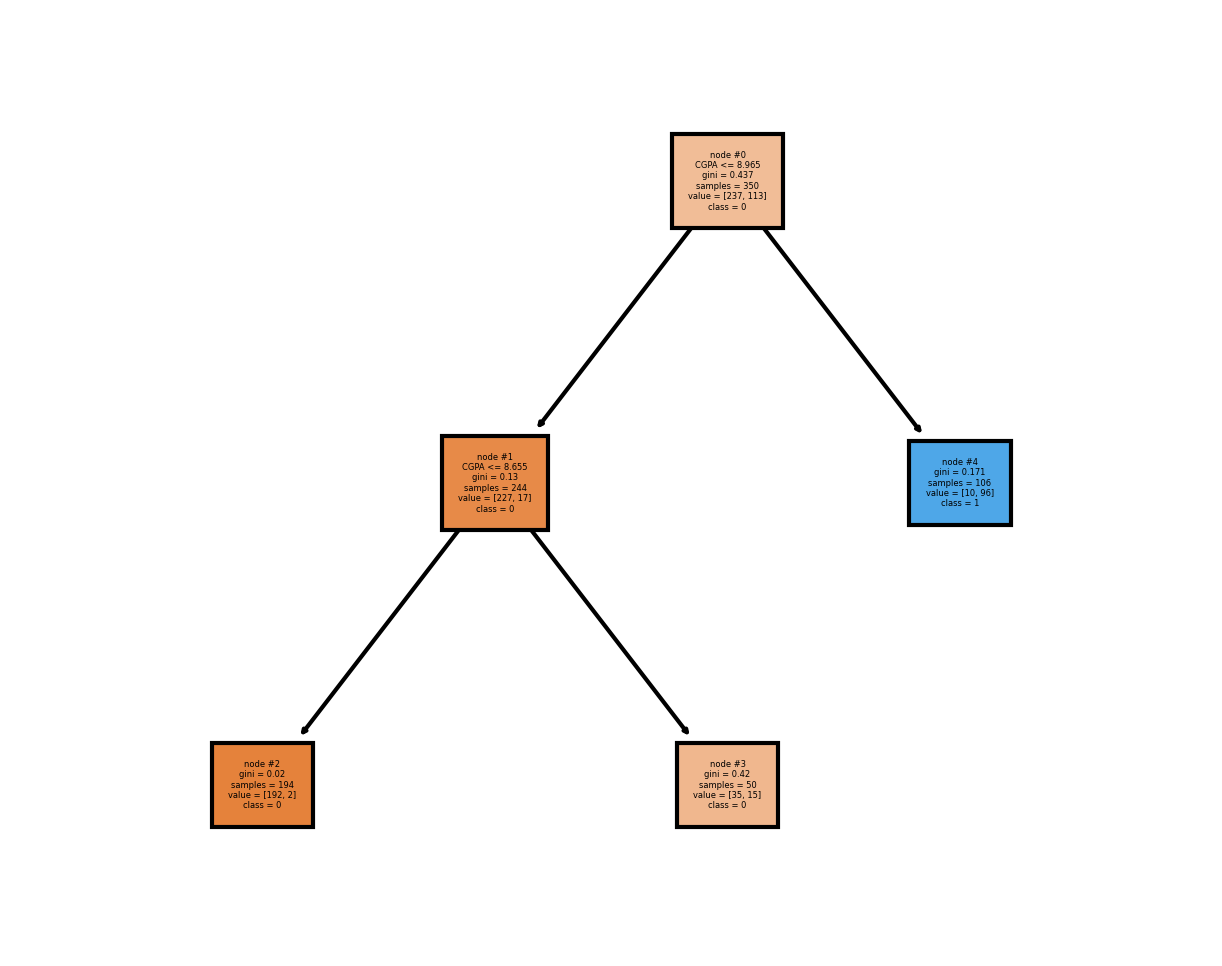

In [51]:
from sklearn import tree
import matplotlib.pyplot as plt

Chance_of_Admit=['0','1']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Chance_of_Admit, 
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); #
#fig.savefig('imagename.png')

In [52]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Chance_of_Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Predicted
7,0,308.0,101.0,2.0,3.0,4.0,7.90,0.0,0
47,1,339.0,119.0,5.0,4.5,4.0,9.70,0.0,1
143,1,340.0,120.0,4.0,4.5,4.0,9.92,1.0,1
161,0,298.0,99.0,1.0,1.5,3.0,7.46,0.0,0
224,0,305.0,105.0,2.0,3.0,2.0,8.23,0.0,0


In [53]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Chance_of_Admit'])
print(matrix)

[[227  17]
 [ 10  96]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       237
           1       0.91      0.85      0.88       113

    accuracy                           0.92       350
   macro avg       0.92      0.90      0.91       350
weighted avg       0.92      0.92      0.92       350



### prediction on Test Dataset

In [55]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
46,329.0,114.0,5.0,4.0,5.0,9.30,1.0,1
486,319.0,102.0,3.0,2.5,2.5,8.37,0.0,0
338,323.0,108.0,5.0,4.0,4.0,8.74,1.0,1
18,318.0,110.0,3.0,4.0,3.0,8.80,0.0,0
117,290.0,104.0,4.0,2.0,2.5,7.46,0.0,0


In [56]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
46,329.0,114.0,5.0,4.0,5.0,9.30,1.0,1
486,319.0,102.0,3.0,2.5,2.5,8.37,0.0,0
338,323.0,108.0,5.0,4.0,4.0,8.74,1.0,1
18,318.0,110.0,3.0,4.0,3.0,8.80,0.0,0
117,290.0,104.0,4.0,2.0,2.5,7.46,0.0,0


In [59]:
test['Predicted']=dt.predict(X_test)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Predicted
46,329.0,114.0,5.0,4.0,5.0,9.30,1.0,1,1
486,319.0,102.0,3.0,2.5,2.5,8.37,0.0,0,0
338,323.0,108.0,5.0,4.0,4.0,8.74,1.0,1,0
18,318.0,110.0,3.0,4.0,3.0,8.80,0.0,0,0
117,290.0,104.0,4.0,2.0,2.5,7.46,0.0,0,0


###  Model Performance Metrics on Test data 

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Chance_of_Admit'])
print(confusion_matrix)

[[101   6]
 [  7  36]]


In [63]:
accuracy_test = ((101+36)/(150)*100)
accuracy_test

91.33333333333333

In [64]:
from sklearn.metrics import classification_report
print(classification_report(test['Chance_of_Admit'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.84      0.86      0.85        42

    accuracy                           0.91       150
   macro avg       0.89      0.90      0.89       150
weighted avg       0.91      0.91      0.91       150



### Q.6 Build a Random Forest classifier, to predict whether a
student has a low or high chance of admission to a chosen
university

In [66]:
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

C:\Users\Suresh\AppData\Local\Temp\ipykernel_20648\1244092360.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Model.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

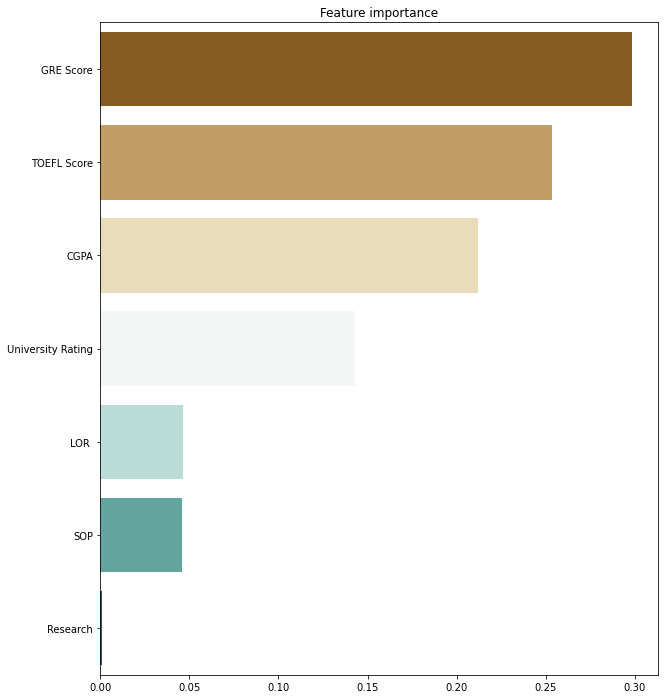

In [70]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


# Random Forest Visualization 

In [75]:
from sklearn.tree import export_graphviz
import pydot

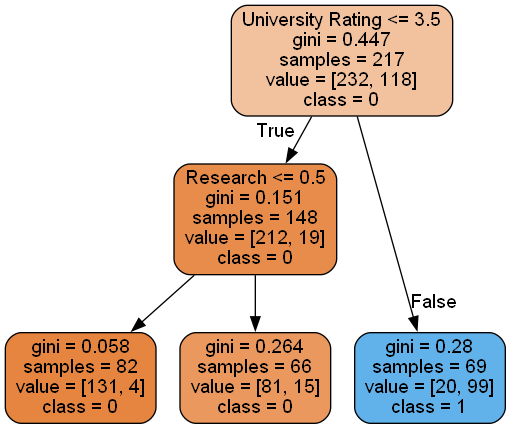

In [76]:
tree = Model.estimators_[1]  # specify the tree number   
Chance_of_Admit=['0','1'] 
# Export the image to a dot file
feature_list = list(x.columns)  # all variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Chance_of_Admit,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

### Prediction on Train Dataset

In [77]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
7,308.0,101.0,2.0,3.0,4.0,7.90,0.0,0
47,339.0,119.0,5.0,4.5,4.0,9.70,0.0,1
143,340.0,120.0,4.0,4.5,4.0,9.92,1.0,1
161,298.0,99.0,1.0,1.5,3.0,7.46,0.0,0
224,305.0,105.0,2.0,3.0,2.0,8.23,0.0,0


In [78]:
train['Predicted']=Model.predict(X_train)
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Predicted
7,308.0,101.0,2.0,3.0,4.0,7.90,0.0,0,0
47,339.0,119.0,5.0,4.5,4.0,9.70,0.0,1,1
143,340.0,120.0,4.0,4.5,4.0,9.92,1.0,1,1
161,298.0,99.0,1.0,1.5,3.0,7.46,0.0,0,0
224,305.0,105.0,2.0,3.0,2.0,8.23,0.0,0,0


### Model Performance Metrics

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Chance_of_Admit'], train['Predicted'])
print(confusion_matrix)

[[218  19]
 [ 12 101]]


In [81]:
accuracy_train=((218+101)/(350)*100)
accuracy_train

91.14285714285715

In [82]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       237
           1       0.84      0.89      0.87       113

    accuracy                           0.91       350
   macro avg       0.89      0.91      0.90       350
weighted avg       0.91      0.91      0.91       350



### Prediction on Test Dataset

In [83]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
46,329.0,114.0,5.0,4.0,5.0,9.30,1.0,1
486,319.0,102.0,3.0,2.5,2.5,8.37,0.0,0
338,323.0,108.0,5.0,4.0,4.0,8.74,1.0,1
18,318.0,110.0,3.0,4.0,3.0,8.80,0.0,0
117,290.0,104.0,4.0,2.0,2.5,7.46,0.0,0


In [84]:
test['Predicted']=Model.predict(X_test)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Predicted
46,329.0,114.0,5.0,4.0,5.0,9.30,1.0,1,1
486,319.0,102.0,3.0,2.5,2.5,8.37,0.0,0,0
338,323.0,108.0,5.0,4.0,4.0,8.74,1.0,1,0
18,318.0,110.0,3.0,4.0,3.0,8.80,0.0,0,0
117,290.0,104.0,4.0,2.0,2.5,7.46,0.0,0,0


### Model Performance Metrics on Test data 

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Chance_of_Admit'])
print(confusion_matrix)

[[100   7]
 [  8  35]]


In [86]:
accuracy_test=((100+35)/(150)*100)
accuracy_test

90.0

In [87]:
from sklearn.metrics import classification_report
print(classification_report(test['Chance_of_Admit'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       108
           1       0.81      0.83      0.82        42

    accuracy                           0.90       150
   macro avg       0.87      0.88      0.88       150
weighted avg       0.90      0.90      0.90       150



# Sensitivity & Specificity

*83% is accuracy of bad customer capture by model
*93% is accuracy of Good customer capture by model

Q.7 Also use Ensemble Modelling techniques, to predict
whether a student has a low or high chance of admission
to a chosen university.

In [88]:
model_parameters = {'n_estimators': [10, 50], 
        'max_depth': [3, 5],
        'learning_rate':[0.8,0.6],
        'min_samples_leaf' : [100,200,270],
        'min_samples_split' : [50,70,80]}

In [93]:
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")


gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\Suresh\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Suresh\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Suresh\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Suresh\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Suresh\anaconda3\lib\site-pa

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [3, 5],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [10, 50]},
             scoring='accuracy', verbose=1)

In [94]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 10}


In [95]:
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

C:\Users\Suresh\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.8, min_samples_leaf=100,
                           min_samples_split=50, n_estimators=10)

In [96]:
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [97]:
train_pred

array(['0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0',
       '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0',
       '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0',
       '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0',
       '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0',
       '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0

## Confusion Matrix Train Data (2 Model)

In [98]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       237
           1       0.90      0.90      0.90       113

    accuracy                           0.94       350
   macro avg       0.93      0.93      0.93       350
weighted avg       0.94      0.94      0.94       350



In [100]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.90      0.86      0.88        42

    accuracy                           0.93       150
   macro avg       0.92      0.91      0.92       150
weighted avg       0.93      0.93      0.93       150



### Important Fearture

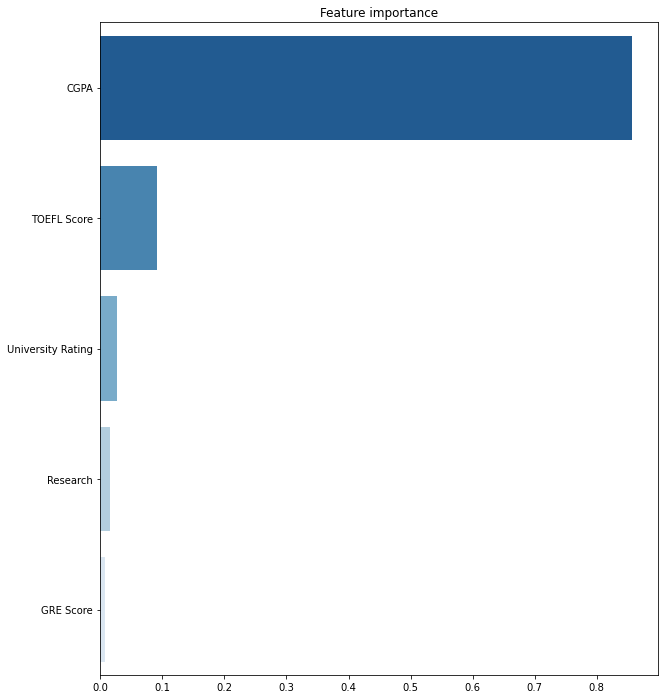

In [101]:
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

Q.8 Compare all of the models and justify your choice about
the optimum model. 

### Decision Tree
* Accuracy of Train Data is 93%
* Accuracy of Test Data is 91%
* so we can say performance of model is Good and Accuracy of model is also Good , so our model is Good

### Random Forest

* Accuracy of Train Data is 91%
* Accuracy of Test Data is 90%
* so we can say performance of model is Good and Accuracy of model is also Good , so our model is Good

### Esembele Model Technique Result

* Accuracy of Train Data is 94%
* Accuracy of Test Data is 93%
* so we can say performance of model is Good and Accuracy of model is also Good , so our model is Good
